In [1]:
%load_ext autoreload
%matplotlib inline

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns  # Seaborn enhances the aesthetics of matplotlib plots

import pandas as pd
import xarray as xr
import seaborn as sns
import warnings
import logging
# sns.set()

from tempest import casestudy
from tempest import grid
from tempest import storm_tracker
from tempest import joint_distrib
from tempest import handler
from tempest.plots.hist import simple_hist

In [14]:
# settings_path = 'settings/sam_4km_30min_30d.yaml'
settings_paths = [
  "settings/arpege_winter_30d.yaml", 
#   "settings/arpege_summer_30d.yaml", 
  
  "settings/ifs_winter_30d.yaml" , 
#   "settings/ifs_summer_30d.yaml" , 
  
  "settings/mpas_winter_30d.yaml", 
#   "settings/mpas_summer_30d.yaml", 

  "settings/screamv1_winter_30d.yaml",
#   "settings/screamv1_summer_30d.yaml", 
 
  "settings/sam_winter_30d.yaml", 
#   "settings/sam_summer_30d.yaml", 

  "settings/um_winter_30d.yaml",
#   "settings/um_summer_30d.yaml",

    "settings/xshield_winter_30d.yaml" , 
#     "settings/fv3_summer_30d.yaml", 
    
    "settings/geos_winter_30d.yaml", 
    "settings/grist_winter_30d.yaml", 
#     "settings/nicam_summer_30d.yaml", 

"settings/obs_winter_30d.yaml",
#   "settings/obs_summer_30d.yaml",
    ]



hdlrs = [handler.Handler(settings_path) for settings_path in settings_paths]
css = [casestudy.CaseStudy(hdlr, overwrite = False ,verbose = False) for hdlr in hdlrs]
grs = [grid.Grid(cs, fast = True, overwrite= False, verbose_steps = False, verbose = False) for cs in css]

## extreme distribs
jds = [joint_distrib.JointDistribution(gr, None, var_id_1 = "mean_unweighted_Prec", var_id_2 = "cond_alpha_75_Prec", 
        nbpd = 20,  nd=4, overwrite = False, dist_mask = False) for gr in grs]

jds_ocean = [joint_distrib.JointDistribution(gr, None, var_id_1 = "mean_unweighted_Prec", var_id_2 = "cond_alpha_75_Prec", 
        nbpd = 20,  nd=4, overwrite = True, dist_mask = "ocean") for gr in grs]

jds_land = [joint_distrib.JointDistribution(gr, None, var_id_1 = "mean_unweighted_Prec", var_id_2 = "cond_alpha_75_Prec", 
        nbpd = 20,  nd=4, overwrite = True, dist_mask = "land") for gr in grs]

## linear distrib
# jds = [joint_distrib.JointDistribution(gr, None, var_id_1 = "mean_unweighted_Prec", var_id_2 = "cond_alpha_85_Prec", 
#         nbpd = 100,  nd=1, overwrite = True, dist_mask = False, dist_bintype = "invlogQ") for gr in grs]

# jds_ocean = [joint_distrib.JointDistribution(gr, None, var_id_1 = "mean_unweighted_Prec", var_id_2 = "cond_alpha_85_Prec", 
#         nbpd = 100,  nd=1, overwrite = True, dist_mask = ocean, dist_bintype = "invlogQ") for gr in grs]

# jds_land = [joint_distrib.JointDistribution(gr, None, var_id_1 = "mean_unweighted_Prec", var_id_2 = "cond_alpha_85_Prec", 
#         nbpd = 100,  nd=1, overwrite = True, dist_mask = ~ocean, dist_bintype = "invlogQ") for gr in grs]

Data loaded from /scratchx/mcarenso/tempest/ARPEGE_Winter_lowRes_Tropics/var_id_days_i_t.json
Data loaded from /scratchx/mcarenso/tempest/IFS_Winter_lowRes_Tropics/var_id_days_i_t.json
Data loaded from /scratchx/mcarenso/tempest/MPAS_Winter_lowRes_Tropics/var_id_days_i_t.json
Data loaded from /scratchx/mcarenso/tempest/SCREAMv1_Winter_lowRes_Tropics/var_id_days_i_t.json
Data loaded from /scratchx/mcarenso/tempest/SAM_Winter_lowRes_Tropics/var_id_days_i_t.json
Data loaded from /scratchx/mcarenso/tempest/UM_Winter_lowRes_Tropics/var_id_days_i_t.json
Data loaded from /scratchx/mcarenso/tempest/XSHiELD_Winter_lowRes_Tropics/var_id_days_i_t.json
Data loaded from /scratchx/mcarenso/tempest/GEOS_Winter_lowRes_Tropics/var_id_days_i_t.json
Data loaded from /scratchx/mcarenso/tempest/GRIST_Winter_lowRes_Tropics/var_id_days_i_t.json
Data loaded from /scratchx/mcarenso/tempest/OBS_Winter_lowRes_Tropics/var_id_days_i_t.json
Found grid attributes file , so loading /scratchx/mcarenso/tempest/ARPEGE_W

/net/nfs/tools/u20/Python/miniconda3_py310_22.11.1-1/envs/pangeo-meso-2023.04.15/lib/python3.10/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges
/net/nfs/tools/u20/Python/miniconda3_py310_22.11.1-1/envs/pangeo-meso-2023.04.15/lib/python3.10/site-packages/numpy/lib/histograms.py:1123: RuntimeWarning: invalid value encountered in divide
  hist = hist / dedges[i].reshape(shape)


Distribs have been recomputed because overwrite is set to True
Overwrite set to true, so computing basics and saving them
Distribs have been recomputed because overwrite is set to True
Overwrite set to true, so computing basics and saving them


/net/nfs/tools/u20/Python/miniconda3_py310_22.11.1-1/envs/pangeo-meso-2023.04.15/lib/python3.10/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges
/net/nfs/tools/u20/Python/miniconda3_py310_22.11.1-1/envs/pangeo-meso-2023.04.15/lib/python3.10/site-packages/numpy/lib/histograms.py:1123: RuntimeWarning: invalid value encountered in divide
  hist = hist / dedges[i].reshape(shape)


Distribs have been recomputed because overwrite is set to True
Overwrite set to true, so computing basics and saving them
Distribs have been recomputed because overwrite is set to True
Overwrite set to true, so computing basics and saving them


/net/nfs/tools/u20/Python/miniconda3_py310_22.11.1-1/envs/pangeo-meso-2023.04.15/lib/python3.10/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges
/net/nfs/tools/u20/Python/miniconda3_py310_22.11.1-1/envs/pangeo-meso-2023.04.15/lib/python3.10/site-packages/numpy/lib/histograms.py:1123: RuntimeWarning: invalid value encountered in divide
  hist = hist / dedges[i].reshape(shape)


Distribs have been recomputed because overwrite is set to True
Overwrite set to true, so computing basics and saving them
Distribs have been recomputed because overwrite is set to True
Overwrite set to true, so computing basics and saving them
Distribs have been recomputed because overwrite is set to True
Overwrite set to true, so computing basics and saving them
Distribs have been recomputed because overwrite is set to True
Overwrite set to true, so computing basics and saving them


/net/nfs/tools/u20/Python/miniconda3_py310_22.11.1-1/envs/pangeo-meso-2023.04.15/lib/python3.10/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges
/net/nfs/tools/u20/Python/miniconda3_py310_22.11.1-1/envs/pangeo-meso-2023.04.15/lib/python3.10/site-packages/numpy/lib/histograms.py:1123: RuntimeWarning: invalid value encountered in divide
  hist = hist / dedges[i].reshape(shape)


Distribs have been recomputed because overwrite is set to True
Overwrite set to true, so computing basics and saving them


/net/nfs/tools/u20/Python/miniconda3_py310_22.11.1-1/envs/pangeo-meso-2023.04.15/lib/python3.10/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges
/net/nfs/tools/u20/Python/miniconda3_py310_22.11.1-1/envs/pangeo-meso-2023.04.15/lib/python3.10/site-packages/numpy/lib/histograms.py:1123: RuntimeWarning: invalid value encountered in divide
  hist = hist / dedges[i].reshape(shape)


Distribs have been recomputed because overwrite is set to True
Overwrite set to true, so computing basics and saving them
Distribs have been recomputed because overwrite is set to True
Overwrite set to true, so computing basics and saving them
Distribs have been recomputed because overwrite is set to True
Overwrite set to true, so computing basics and saving them


/net/nfs/tools/u20/Python/miniconda3_py310_22.11.1-1/envs/pangeo-meso-2023.04.15/lib/python3.10/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges
/net/nfs/tools/u20/Python/miniconda3_py310_22.11.1-1/envs/pangeo-meso-2023.04.15/lib/python3.10/site-packages/numpy/lib/histograms.py:1123: RuntimeWarning: invalid value encountered in divide
  hist = hist / dedges[i].reshape(shape)


Distribs have been recomputed because overwrite is set to True
Overwrite set to true, so computing basics and saving them
Distribs have been recomputed because overwrite is set to True
Overwrite set to true, so computing basics and saving them
Distribs have been recomputed because overwrite is set to True
Overwrite set to true, so computing basics and saving them
Distribs have been recomputed because overwrite is set to True
Overwrite set to true, so computing basics and saving them
Distribs have been recomputed because overwrite is set to True
Overwrite set to true, so computing basics and saving them
Distribs have been recomputed because overwrite is set to True
Overwrite set to true, so computing basics and saving them
Distribs have been recomputed because overwrite is set to True
Overwrite set to true, so computing basics and saving them


/net/nfs/tools/u20/Python/miniconda3_py310_22.11.1-1/envs/pangeo-meso-2023.04.15/lib/python3.10/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges
/net/nfs/tools/u20/Python/miniconda3_py310_22.11.1-1/envs/pangeo-meso-2023.04.15/lib/python3.10/site-packages/numpy/lib/histograms.py:1123: RuntimeWarning: invalid value encountered in divide
  hist = hist / dedges[i].reshape(shape)


Distribs have been recomputed because overwrite is set to True
Overwrite set to true, so computing basics and saving them


## ranks - percentiles values

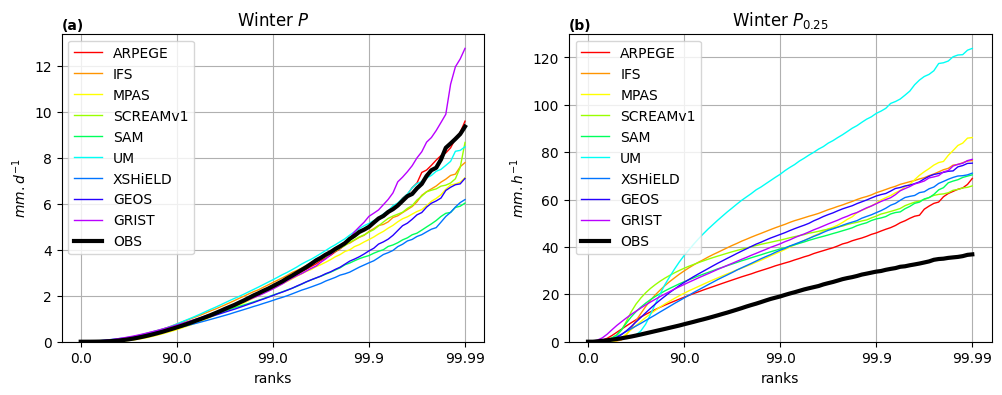

In [36]:
fig, axs = plt.subplots(1, 2, figsize = (12, 4))
# plt.suptitle("ocean : '--' ; land : '..', ocean+land : solid")

# Plot colors per models
num_colors = 10
cmap = plt.get_cmap('hsv')
color_values = np.linspace(0, 0.9, num_colors)
model_colors = [cmap(value) for value in color_values]
model_colors[2] = (1.0, 1.0, 0.0, 1.0) ## yellow
model_colors[3] = (0.6, 1.0, 0.0, 1.0) ## greenish yellow
colors = model_colors

# for idx, (jd, jd_ocean, jd_land) in enumerate(zip(jds, jds_ocean, jds_land)): 
for idx, jd, jd_ocean, jd_land in zip(np.arange(len(jds_ocean)), jds, jds_ocean, jds_land): 

    model, season = jd_ocean.name.split("_")[0], jd_ocean.name.split("_")[1]
    if season == "Winter":
        color = colors[idx] if model != "OBS" else  "black"
        lw = 1 if model != "OBS" else  3
        x = np.arange(len(jd_ocean.dist1.ranks))

        axs[0].plot(x, jd.dist1.percentiles, label = model, color = color, linewidth = lw)
        axs[1].plot(x, jd.dist2.percentiles, label = model, color = color, linewidth = lw)


axs[0].legend()
axs[1].legend()

axs[0].set_xticks(x[::20], jd.dist1.ranks[::20])
axs[1].set_xticks(x[::20], jd.dist2.ranks[::20])

axs[0].set_title(r"Winter $P$")
axs[0].text(-0., 1.05, "(a)", transform=axs[0].transAxes, fontweight='bold', va='top')

axs[1].set_title(r"Winter $P_{0.25}$")
axs[1].text(-0., 1.05, "(b)", transform=axs[1].transAxes, fontweight='bold', va='top')

axs[0].set_xlabel(r"ranks")
axs[1].set_xlabel(r"ranks")

axs[0].set_ylabel(r"$mm.d^{-1}$")
axs[1].set_ylabel(r"$mm.h^{-1}$")

axs[0].set_ylim(bottom=0)
axs[1].set_ylim(bottom=0)

axs[0].grid()
axs[1].grid()

## Suppl Summer

In [2]:
# settings_path = 'settings/sam_4km_30min_30d.yaml'
settings_paths = [
  # "settings/arpege_winter_30d.yaml", 
  "settings/arpege_summer_30d.yaml", 
  
  # "settings/ifs_winter_30d.yaml" , 
  "settings/ifs_summer_30d.yaml" , 
  
  # "settings/mpas_winter_30d.yaml", 
  "settings/mpas_summer_30d.yaml", 

  # "settings/screamv1_winter_30d.yaml",
  "settings/screamv1_summer_30d.yaml", 
 
  # "settings/sam_winter_30d.yaml", 
  "settings/sam_summer_30d.yaml", 

  # "settings/um_winter_30d.yaml",
  "settings/um_summer_30d.yaml",

    # "settings/xshield_winter_30d.yaml" , 
    "settings/fv3_summer_30d.yaml", 
    
    # "settings/geos_winter_30d.yaml", 
    # "settings/grist_winter_30d.yaml", 
    "settings/nicam_summer_30d.yaml", 

# "settings/obs_winter_30d.yaml",
  "settings/obs_summer_30d.yaml",
    ]



hdlrs = [handler.Handler(settings_path) for settings_path in settings_paths]
css = [casestudy.CaseStudy(hdlr, overwrite = False ,verbose = False) for hdlr in hdlrs]
grs = [grid.Grid(cs, fast = True, overwrite= False, verbose_steps = False, verbose = False) for cs in css]

## extreme distribs
jds = [joint_distrib.JointDistribution(gr, None, var_id_1 = "mean_unweighted_Prec", var_id_2 = "cond_alpha_75_Prec", 
        nbpd = 20,  nd=4, overwrite = False, dist_mask = False) for gr in grs]

jds_ocean = [joint_distrib.JointDistribution(gr, None, var_id_1 = "mean_unweighted_Prec", var_id_2 = "cond_alpha_75_Prec", 
        nbpd = 20,  nd=4, overwrite = True, dist_mask = "ocean") for gr in grs]

jds_land = [joint_distrib.JointDistribution(gr, None, var_id_1 = "mean_unweighted_Prec", var_id_2 = "cond_alpha_75_Prec", 
        nbpd = 20,  nd=4, overwrite = True, dist_mask = "land") for gr in grs]

## linear distrib
# jds = [joint_distrib.JointDistribution(gr, None, var_id_1 = "mean_unweighted_Prec", var_id_2 = "cond_alpha_85_Prec", 
#         nbpd = 100,  nd=1, overwrite = True, dist_mask = False, dist_bintype = "invlogQ") for gr in grs]

# jds_ocean = [joint_distrib.JointDistribution(gr, None, var_id_1 = "mean_unweighted_Prec", var_id_2 = "cond_alpha_85_Prec", 
#         nbpd = 100,  nd=1, overwrite = True, dist_mask = ocean, dist_bintype = "invlogQ") for gr in grs]

# jds_land = [joint_distrib.JointDistribution(gr, None, var_id_1 = "mean_unweighted_Prec", var_id_2 = "cond_alpha_85_Prec", 
#         nbpd = 100,  nd=1, overwrite = True, dist_mask = ~ocean, dist_bintype = "invlogQ") for gr in grs]

Data loaded from /scratchx/mcarenso/tempest/ARPEGE_Summer_lowRes_Tropics/var_id_days_i_t.json
Data loaded from /scratchx/mcarenso/tempest/IFS_Summer_lowRes_Tropics/var_id_days_i_t.json
Data loaded from /scratchx/mcarenso/tempest/MPAS_Summer_lowRes_Tropics/var_id_days_i_t.json
Data loaded from /scratchx/mcarenso/tempest/SCREAMv1_Summer_lowRes_Tropics/var_id_days_i_t.json
Data loaded from /scratchx/mcarenso/tempest/SAM_Summer_lowRes_Tropics/var_id_days_i_t.json
Data loaded from /scratchx/mcarenso/tempest/UM_Summer_lowRes_Tropics/var_id_days_i_t.json
Data loaded from /scratchx/mcarenso/tempest/FV3_Summer_lowRes_Tropics/var_id_days_i_t.json
Data loaded from /scratchx/mcarenso/tempest/NICAM_Summer_lowRes_Tropics/var_id_days_i_t.json
Data loaded from /scratchx/mcarenso/tempest/OBS_Summer_lowRes_Tropics/var_id_days_i_t.json
Found grid attributes file , so loading /scratchx/mcarenso/tempest/ARPEGE_Summer_lowRes_Tropics/grid_attributes.pkl instead of computing
Found grid attributes file , so lo

/net/nfs/tools/u20/Python/miniconda3_py310_22.11.1-1/envs/pangeo-meso-2023.04.15/lib/python3.10/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges
/net/nfs/tools/u20/Python/miniconda3_py310_22.11.1-1/envs/pangeo-meso-2023.04.15/lib/python3.10/site-packages/numpy/lib/histograms.py:1123: RuntimeWarning: invalid value encountered in divide
  hist = hist / dedges[i].reshape(shape)


Distribs have been recomputed because overwrite is set to True
Overwrite set to true, so computing basics and saving them
Distribs have been recomputed because overwrite is set to True
Overwrite set to true, so computing basics and saving them
Distribs have been recomputed because overwrite is set to True
Overwrite set to true, so computing basics and saving them
Distribs have been recomputed because overwrite is set to True
Overwrite set to true, so computing basics and saving them
Distribs have been recomputed because overwrite is set to True
Overwrite set to true, so computing basics and saving them
Distribs have been recomputed because overwrite is set to True
Overwrite set to true, so computing basics and saving them
Distribs have been recomputed because overwrite is set to True
Overwrite set to true, so computing basics and saving them
Distribs have been recomputed because overwrite is set to True
Overwrite set to true, so computing basics and saving them
Distribs have been recom

/net/nfs/tools/u20/Python/miniconda3_py310_22.11.1-1/envs/pangeo-meso-2023.04.15/lib/python3.10/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges
/net/nfs/tools/u20/Python/miniconda3_py310_22.11.1-1/envs/pangeo-meso-2023.04.15/lib/python3.10/site-packages/numpy/lib/histograms.py:1123: RuntimeWarning: invalid value encountered in divide
  hist = hist / dedges[i].reshape(shape)


Distribs have been recomputed because overwrite is set to True
Overwrite set to true, so computing basics and saving them


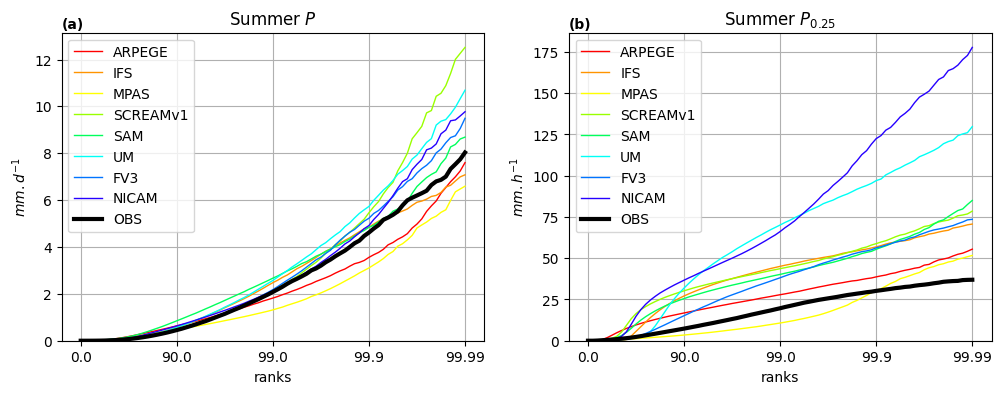

In [4]:
fig, axs = plt.subplots(1, 2, figsize = (12, 4))
# plt.suptitle("ocean : '--' ; land : '..', ocean+land : solid")

# Plot colors per models
num_colors = 10
cmap = plt.get_cmap('hsv')
color_values = np.linspace(0, 0.9, num_colors)
model_colors = [cmap(value) for value in color_values]
model_colors[2] = (1.0, 1.0, 0.0, 1.0) ## yellow
model_colors[3] = (0.6, 1.0, 0.0, 1.0) ## greenish yellow
colors = model_colors

# for idx, (jd, jd_ocean, jd_land) in enumerate(zip(jds, jds_ocean, jds_land)): 
for idx, jd, jd_ocean, jd_land in zip(np.arange(len(jds_ocean)), jds, jds_ocean, jds_land): 

    model, season = jd_ocean.name.split("_")[0], jd_ocean.name.split("_")[1]
    if season == "Summer":
        color = colors[idx] if model != "OBS" else  "black"
        lw = 1 if model != "OBS" else  3
        x = np.arange(len(jd_ocean.dist1.ranks))

        axs[0].plot(x, jd.dist1.percentiles, label = model, color = color, linewidth = lw)
        axs[1].plot(x, jd.dist2.percentiles, label = model, color = color, linewidth = lw)


axs[0].legend()
axs[1].legend()

axs[0].set_xticks(x[::20], jd.dist1.ranks[::20])
axs[1].set_xticks(x[::20], jd.dist2.ranks[::20])

axs[0].set_title(r"Summer $P$")
axs[0].text(-0., 1.05, "(a)", transform=axs[0].transAxes, fontweight='bold', va='top')

axs[1].set_title(r"Summer $P_{0.25}$")
axs[1].text(-0., 1.05, "(b)", transform=axs[1].transAxes, fontweight='bold', va='top')

axs[0].set_xlabel(r"ranks")
axs[1].set_xlabel(r"ranks")

axs[0].set_ylabel(r"$mm.d^{-1}$")
axs[1].set_ylabel(r"$mm.h^{-1}$")

axs[0].set_ylim(bottom=0)
axs[1].set_ylim(bottom=0)

axs[0].grid()
axs[1].grid()